# Diabetes Analysis

### Author: Ly Duc Trung

### Link: https://github.com/DucTrung1802/DS/blob/main/GLM_Report/diabetes_analysis.ipynb

### Dataset Link: https://www.archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

## 0. Install and import libraries

### 0.1. Install

In [415]:
install.packages("corrplot", repos="https://cran.rstudio.com/")

Warning message:
"unable to access index for repository https://cran.rstudio.com/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.rstudio.com/bin/windows/contrib/3.6/PACKAGES'"installing the source package 'corrplot'



### 0.2. Import

In [416]:
library(corrplot)

## 1. Import Data

In [317]:
input_data = read.csv("diabetes_full_data.csv")

In [318]:
df = data.frame(input_data)

In [319]:
df

X,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,...,0,2,3,0,0,0,11,5,4,0
5,1,1,1,25,1,0,0,1,1,...,0,2,0,2,0,1,10,6,8,0
6,1,0,1,30,1,0,0,0,0,...,0,3,0,14,0,0,9,6,7,0
7,1,1,1,25,1,0,0,1,0,...,0,3,0,0,1,0,11,4,4,0
8,1,1,1,30,1,0,1,0,1,...,0,5,30,30,1,0,9,5,1,1
9,0,0,1,24,0,0,0,0,0,...,0,2,0,0,0,1,8,4,3,0


## 2. Data Preprocessing

### 2.0. Standardize column names

In [320]:
colnames(df)
# Column "X" should be changed to be a more meaningful name.

[1] "X"                    "HighBP"               "HighChol"            
 [4] "CholCheck"            "BMI"                  "Smoker"              
 [7] "Stroke"               "HeartDiseaseorAttack" "PhysActivity"        
[10] "Fruits"               "Veggies"              "HvyAlcoholConsump"   
[13] "AnyHealthcare"        "NoDocbcCost"          "GenHlth"             
[16] "MentHlth"             "PhysHlth"             "DiffWalk"            
[19] "Sex"                  "Age"                  "Education"           
[22] "Income"               "Diabetes_binary"

In [321]:
colnames(df)[1] = "Index"

In [322]:
colnames(df)

[1] "Index"                "HighBP"               "HighChol"            
 [4] "CholCheck"            "BMI"                  "Smoker"              
 [7] "Stroke"               "HeartDiseaseorAttack" "PhysActivity"        
[10] "Fruits"               "Veggies"              "HvyAlcoholConsump"   
[13] "AnyHealthcare"        "NoDocbcCost"          "GenHlth"             
[16] "MentHlth"             "PhysHlth"             "DiffWalk"            
[19] "Sex"                  "Age"                  "Education"           
[22] "Income"               "Diabetes_binary"

### 2.1. Mismatched data types

In [323]:
str(df)

'data.frame':	253680 obs. of  23 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk          

In [324]:
# All columns have correct data type

### 2.2. Mixed data values

In [325]:
# Example: (female, woman, man, male) => (male, female)

In [326]:
# This dataset contains only number data => No mixed data values

### 2.3. Missing data

#### 2.3.1 Null data

In [327]:
sum(is.na(df))

[1] 0

In [328]:
# This dataset has no missing values

#### 2.3.2 Missing data in specific columns

In [329]:
# We see that in column "Age", the value could have value of 14 
# which is Don’t know / Refused / Missing (_AGEG5YR - BRFSS)

In [330]:
nrow(subset(df, Age == 14))

[1] 0

In [331]:
# Conclusion: The dataset has no missing data.

### 2.4. Numeric and Categorical variables classification

In [332]:
str(df)

'data.frame':	253680 obs. of  23 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk          

In [333]:
df$HighBP = factor(df$HighBP)

In [334]:
df$HighChol = factor(df$HighChol)

In [335]:
df$CholCheck = factor(df$CholCheck)

In [336]:
df$Smoker = factor(df$Smoker)

In [337]:
df$Stroke = factor(df$Stroke)

In [338]:
df$HeartDiseaseorAttack = factor(df$HeartDiseaseorAttack)

In [339]:
df$PhysActivity = factor(df$PhysActivity)

In [340]:
df$Fruits = factor(df$Fruits)

In [341]:
df$Veggies = factor(df$Veggies)

In [342]:
df$HvyAlcoholConsump = factor(df$HvyAlcoholConsump)

In [343]:
df$AnyHealthcare = factor(df$AnyHealthcare)

In [344]:
df$NoDocbcCost = factor(df$NoDocbcCost)

In [345]:
df$GenHlth = factor(df$GenHlth, ordered=T)

In [346]:
df$DiffWalk = factor(df$DiffWalk)

In [347]:
df$Sex = factor(df$Sex)

In [348]:
df$Age = factor(df$Age, ordered=T)

In [349]:
df$Education = factor(df$Education, ordered=T)

In [350]:
df$Income = factor(df$Income, ordered=T)

In [351]:
df$Diabetes_binary = factor(df$Diabetes_binary)

In [352]:
str(df)

'data.frame':	253680 obs. of  23 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 2 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 2 1 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 2 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2

## 3. Exploratory data analysis (EDA)

### 3.1. Response variable analysis

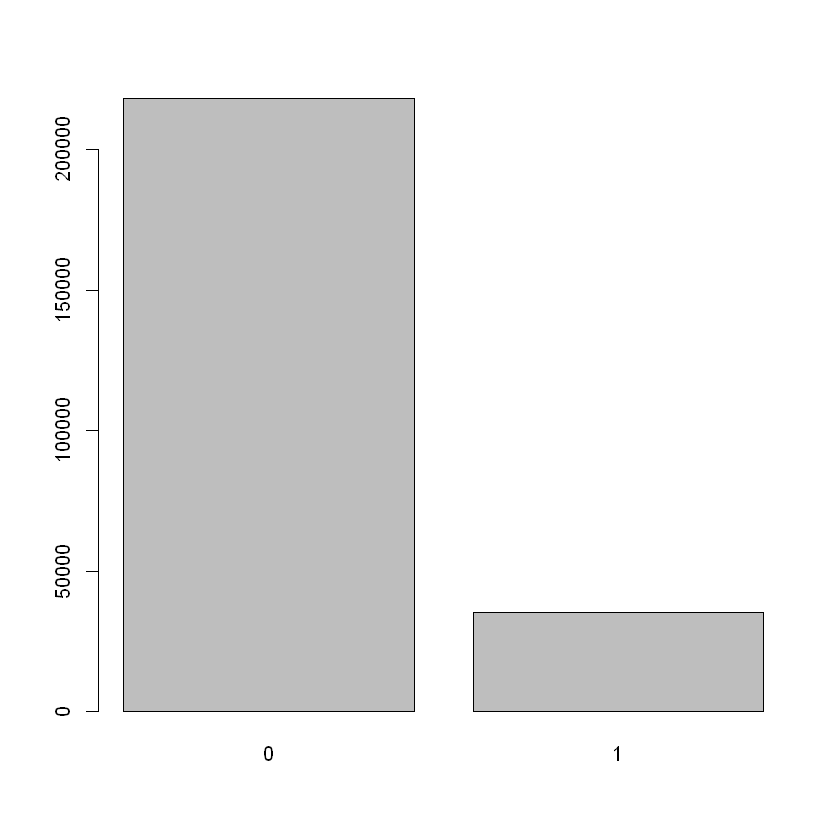

In [353]:
barplot(table(df$Diabetes_binary))

### 3.2. Numeric variables analysis

In [354]:
# Numeric variables (3): BMI, MentHlth, PhysHlth

#### 3.2.1. Overview

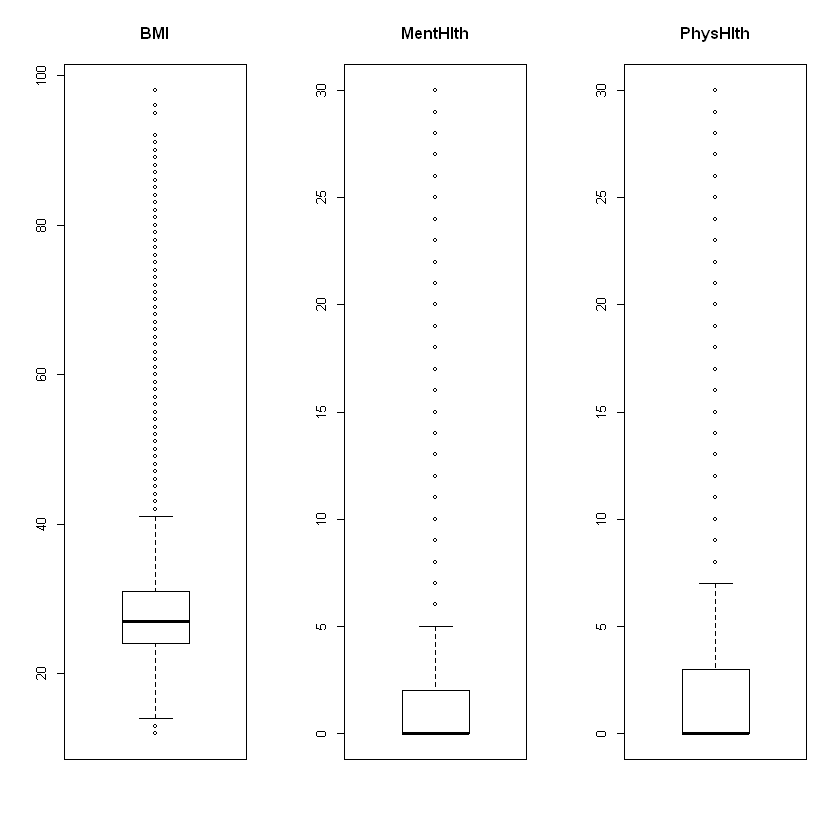

In [355]:
par(mfrow=c(1,3))
boxplot(df$BMI, main="BMI")
boxplot(df$MentHlth, main="MentHlth")
boxplot(df$PhysHlth, main="PhysHlth")

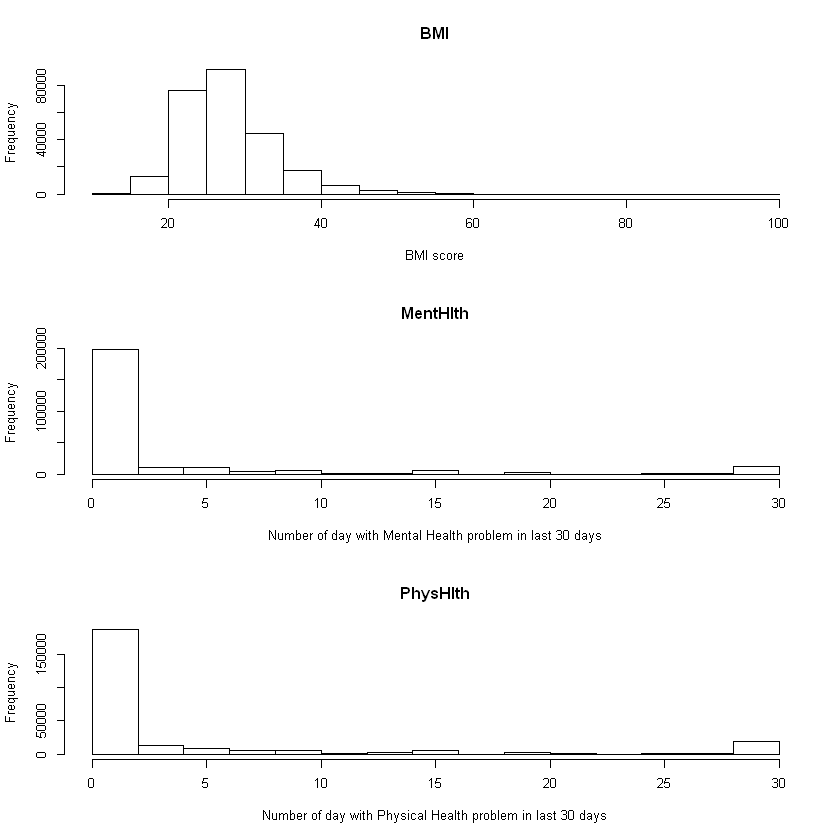

In [356]:
par(mfrow=c(3,1))
hist(df$BMI, main="BMI", xlab="BMI score")
hist(df$MentHlth, main="MentHlth", xlab="Number of day with Mental Health problem in last 30 days")
hist(df$PhysHlth, main="PhysHlth", xlab="Number of day with Physical Health problem in last 30 days")

#### 3.2.1. BMI

In [357]:
summary(df$BMI)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.00   24.00   27.00   28.38   31.00   98.00 

In [358]:
# We see maximum value of BMI is 98 which is abnormal.

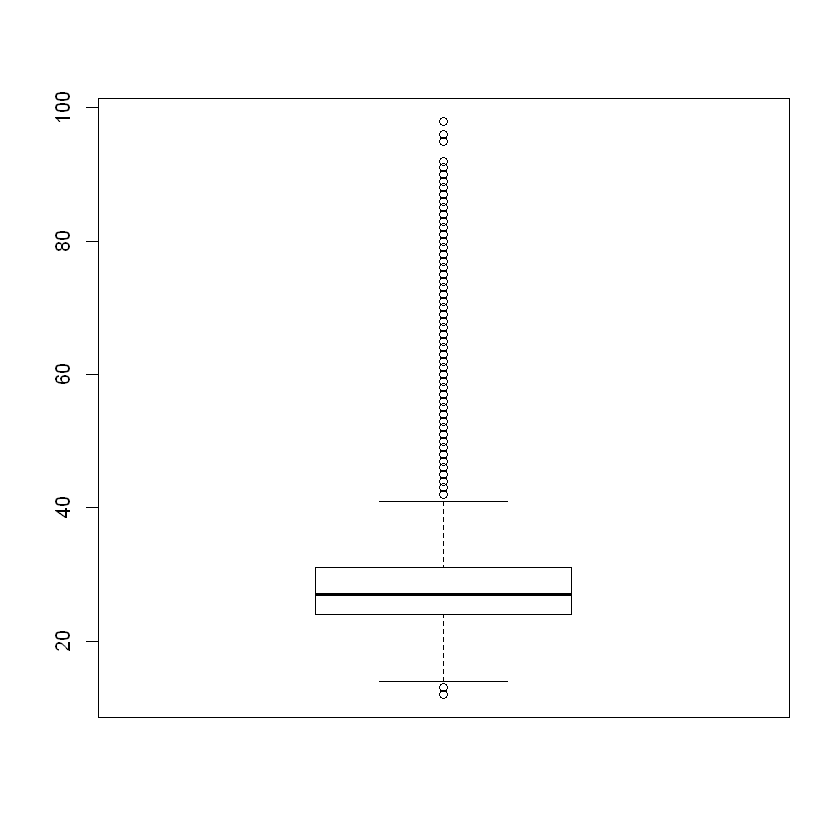

In [359]:
# Boxplot data
boxplot(df$BMI)

In [360]:
# We see that dataset has several outliers in "BMI" column.

In [361]:
BMI_q1 = quantile(df$BMI, 0.25)
BMI_q3 = quantile(df$BMI, 0.75)
BMI_iqr = BMI_q3 - BMI_q1
BMI_lower_bound = BMI_q1 - 1.5 * BMI_iqr
BMI_upper_bound = BMI_q3 + 1.5 * BMI_iqr

In [362]:
BMI_outlier_df = df[df$BMI < BMI_lower_bound | df$BMI > BMI_upper_bound, ]

In [363]:
nrow(BMI_outlier_df) / nrow(df) * 100

[1] 3.881662

In [364]:
# We see that the percentage of outliers is approximately about 4%.
# Extreme values of BMI that higher 40 could affect the model.

# To standardize the BMI index, WHO recommendations is used.
# Reference: https://www.who.int/europe/news-room/fact-sheets/item/a-healthy-lifestyle---who-recommendations

# |   BMI     | Nutritional Status | Categorical |
# |-----------|--------------------|-------------|
# | < 18.5    | Underweight        |      1      |
# | 18.5–24.9 | Normal weight      |      2      |
# | 25.0–29.9 | Pre-obesity        |      3      |
# | 30.0–34.9 | Obesity class I    |      4      |
# | 35.0–39.9 | Obesity class II   |      5      |
# | > 40      | Obesity class III  |      6      |

new_column = rep(0, nrow(df))
BMI_index = which(colnames(df) == "BMI")
df_std_1 = cbind(df[,1:BMI_index], StdBMI = new_column, df[,(BMI_index + 1):ncol(df)])

In [365]:
df_std_1

Index,HighBP,HighChol,CholCheck,BMI,StdBMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,0,1,0,0,0,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,0,1,0,0,1,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,0,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,0,1,...,0,2,3,0,0,0,11,5,4,0
5,1,1,1,25,0,1,0,0,1,...,0,2,0,2,0,1,10,6,8,0
6,1,0,1,30,0,1,0,0,0,...,0,3,0,14,0,0,9,6,7,0
7,1,1,1,25,0,1,0,0,1,...,0,3,0,0,1,0,11,4,4,0
8,1,1,1,30,0,1,0,1,0,...,0,5,30,30,1,0,9,5,1,1
9,0,0,1,24,0,0,0,0,0,...,0,2,0,0,0,1,8,4,3,0


In [366]:
df_std_1[df_std_1$BMI < 18.5, ]$StdBMI = 1
df_std_1[df_std_1$BMI >= 18.5 & df_std_1$BMI < 25, ]$StdBMI = 2
df_std_1[df_std_1$BMI >= 25 & df_std_1$BMI < 30, ]$StdBMI = 3
df_std_1[df_std_1$BMI >= 30 & df_std_1$BMI < 35, ]$StdBMI = 4
df_std_1[df_std_1$BMI >= 35 & df_std_1$BMI < 40, ]$StdBMI = 5
df_std_1[df_std_1$BMI >= 40, ]$StdBMI = 6

In [367]:
df_std_1

Index,HighBP,HighChol,CholCheck,BMI,StdBMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,6,1,0,0,0,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,3,1,0,0,1,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,3,0,0,0,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,3,0,0,0,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,2,0,0,0,1,...,0,2,3,0,0,0,11,5,4,0
5,1,1,1,25,3,1,0,0,1,...,0,2,0,2,0,1,10,6,8,0
6,1,0,1,30,4,1,0,0,0,...,0,3,0,14,0,0,9,6,7,0
7,1,1,1,25,3,1,0,0,1,...,0,3,0,0,1,0,11,4,4,0
8,1,1,1,30,4,1,0,1,0,...,0,5,30,30,1,0,9,5,1,1
9,0,0,1,24,2,0,0,0,0,...,0,2,0,0,0,1,8,4,3,0


In [368]:
table(df_std_1$StdBMI)


    1     2     3     4     5     6 
 3127 68953 93749 53451 20663 13737 

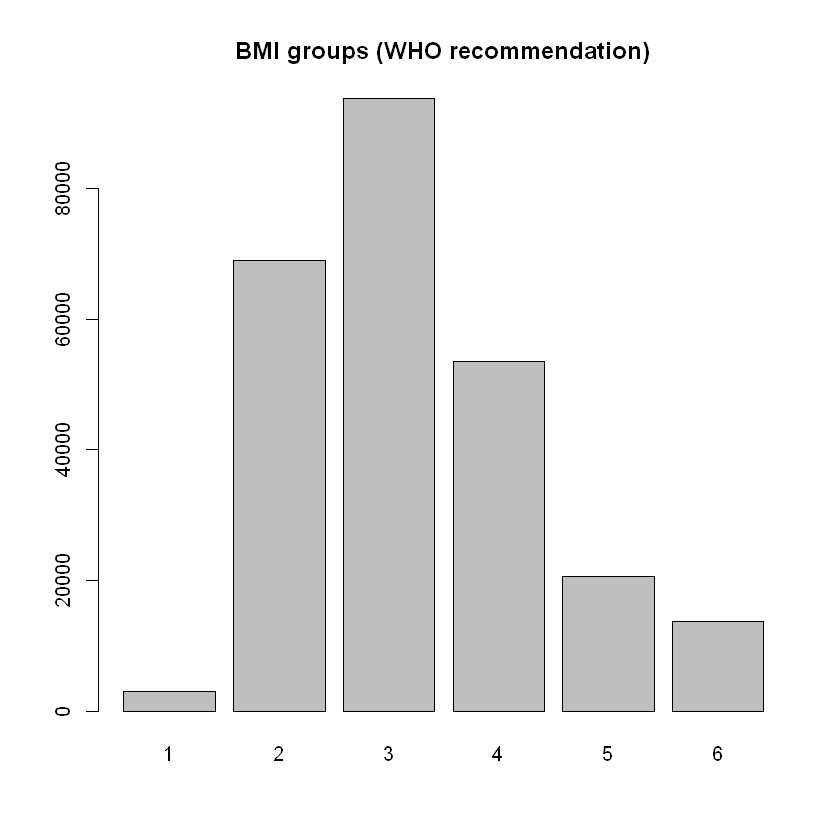

In [369]:
barplot(table(df_std_1$StdBMI), main="BMI groups (WHO recommendation)")

In [370]:
df_std_1$StdBMI = factor(df_std_1$StdBMI, ordered = T)

In [371]:
str(df_std_1)

'data.frame':	253680 obs. of  24 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 2 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ StdBMI              : Ord.factor w/ 6 levels "1"<"2"<"3"<"4"<..: 6 3 3 3 2 3 4 3 4 2 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 2 1 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 2 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 

In [372]:
# Comment: StdBMI data are categorical.

In [373]:
# We now must validate the meaningful of this standardizatiton with response variable.

In [374]:
table(df_std_1$StdBMI, df_std_1$Diabetes_binary)

   
        0     1
  1  2958   169
  2 65025  3928
  3 83057 10692
  4 43170 10281
  5 14994  5669
  6  9130  4607

In [375]:
chisq.test(table(df_std_1$StdBMI, df_std_1$Diabetes_binary))


	Pearson's Chi-squared test

data:  table(df_std_1$StdBMI, df_std_1$Diabetes_binary)
X-squared = 13387, df = 5, p-value < 2.2e-16


In [376]:
# Comment: A p-value close to 0 shows that there is a difference between diabetes rates among BMI groups.

#### BMI output: df_std_1

In [377]:
str(df_std_1)

'data.frame':	253680 obs. of  24 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 2 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ StdBMI              : Ord.factor w/ 6 levels "1"<"2"<"3"<"4"<..: 6 3 3 3 2 3 4 3 4 2 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 2 1 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 2 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 

#### 3.2.2. MentHlth

In [378]:
summary(df_std_1$MentHlth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   3.185   2.000  30.000 

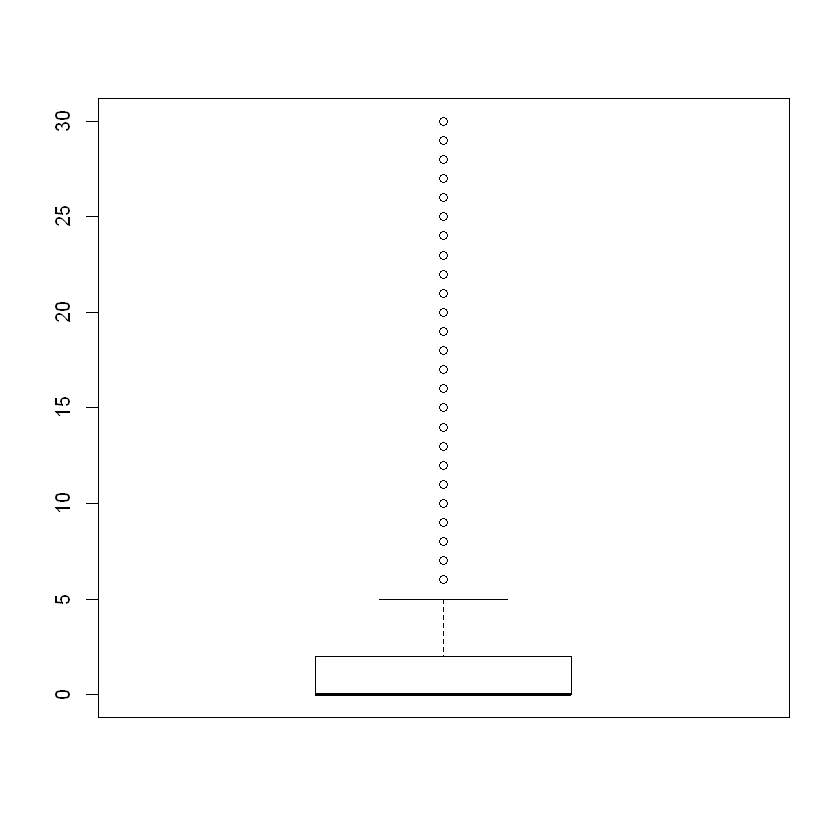

In [379]:
boxplot(df_std_1$MentHlth)

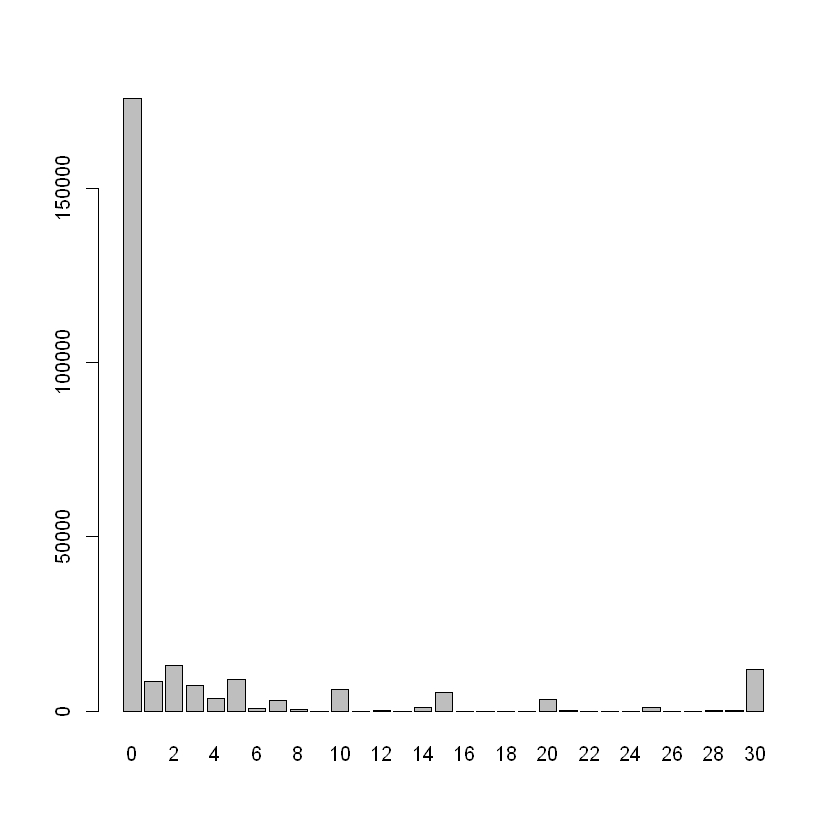

In [380]:
barplot(table(df_std_1$MentHlth))

In [381]:
# We see data with value ZERO is overwhelmed compared to other values.
# Create a binary feature indicates that whether a person has mental health problem.

In [382]:
new_column = rep(0, nrow(df_std_1))
MentHlth_index = which(colnames(df_std_1) == "MentHlth")
df_std_2 = cbind(df_std_1[,1:MentHlth_index], BoolMentHlth = new_column, df_std_1[,(MentHlth_index+1):ncol(df_std_1)])

In [383]:
df_std_2[df_std_2$MentHlth > 0, ]$BoolMentHlth = 1

In [384]:
df_std_2$BoolMentHlth = factor(df_std_2$BoolMentHlth)

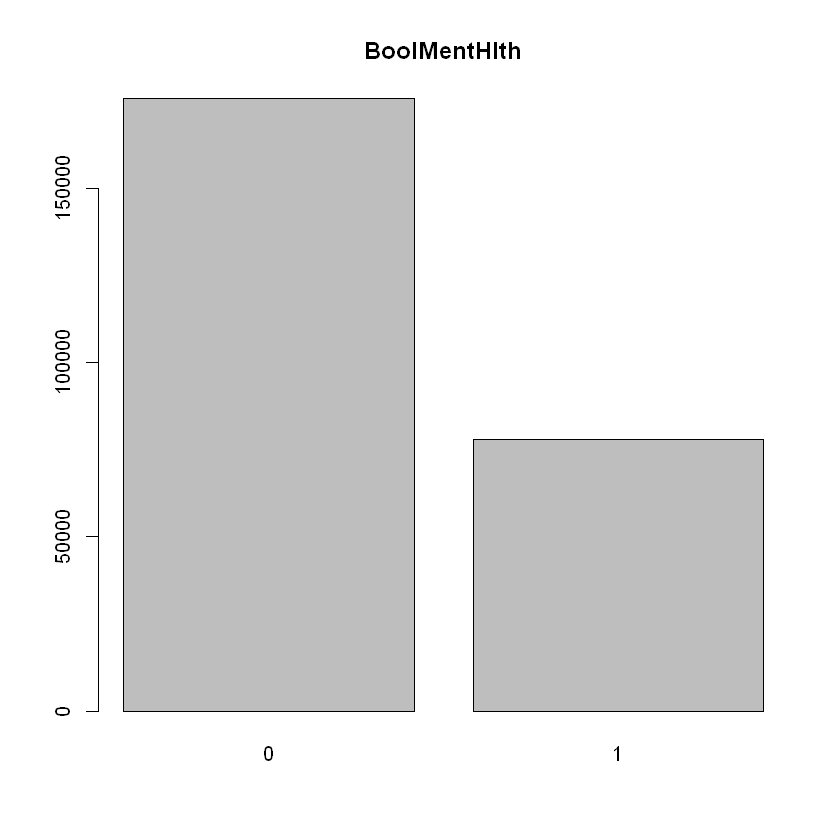

In [385]:
barplot(table(df_std_2$BoolMentHlth), main="BoolMentHlth")

In [386]:
chisq.test(table(df_std_2$BoolMentHlth, df_std_2$Diabetes_binary))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(df_std_2$BoolMentHlth, df_std_2$Diabetes_binary)
X-squared = 178.24, df = 1, p-value < 2.2e-16


In [403]:
# Comment: A p-value close to 0 shows that there is a difference between diabetes rates among BoolMentHlth groups.

#### MentHlth output: df_std_2

In [388]:
str(df_std_2)

'data.frame':	253680 obs. of  25 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 2 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ StdBMI              : Ord.factor w/ 6 levels "1"<"2"<"3"<"4"<..: 6 3 3 3 2 3 4 3 4 2 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 2 1 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 2 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 

#### 3.2.3. PhysHlth

In [389]:
summary(df_std_2$PhysHlth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   4.242   3.000  30.000 

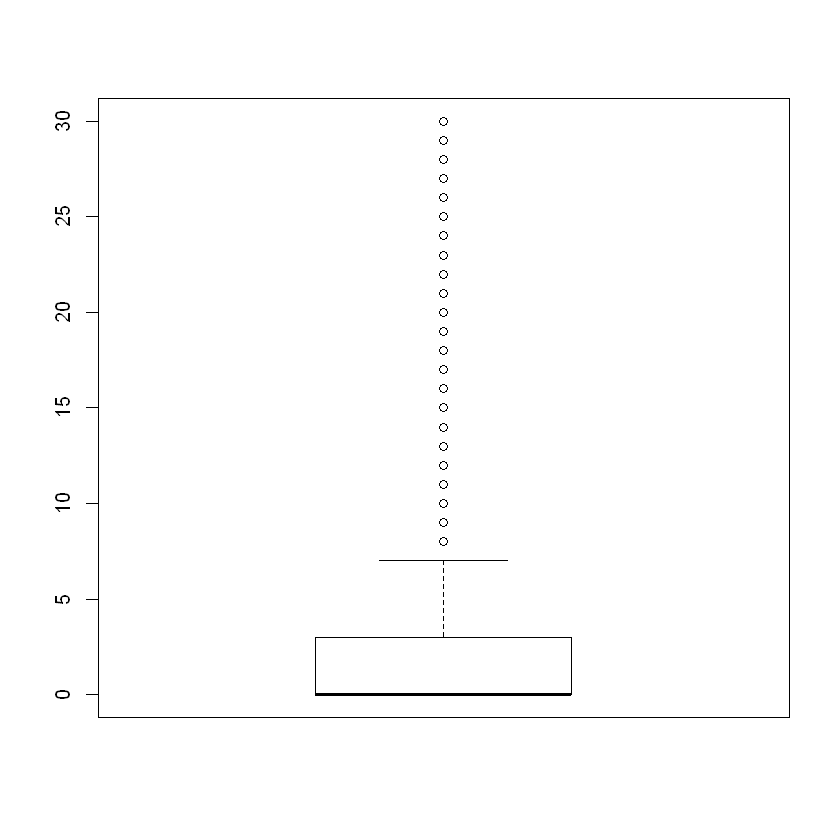

In [390]:
boxplot(df_std_1$PhysHlth)

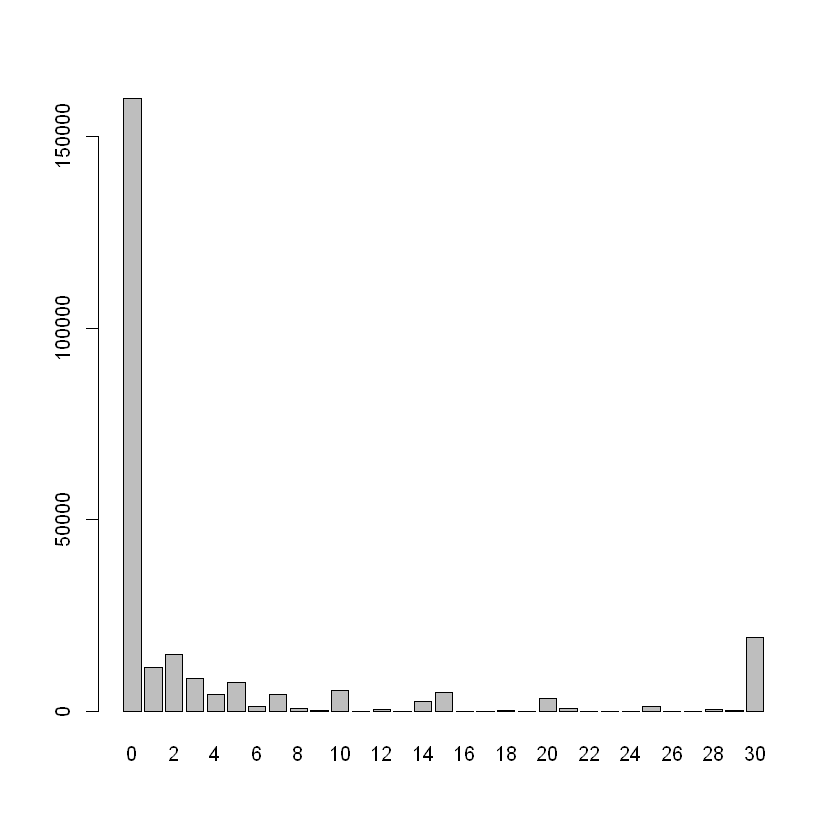

In [391]:
barplot(table(df_std_2$PhysHlth))

In [392]:
# We see data with value ZERO is overwhelmed compared to other values.
# Create a binary feature indicates that whether a person has physical health problem.

In [393]:
new_column = rep(0, nrow(df_std_2))
PhysHlth_index = which(colnames(df_std_2) == "PhysHlth")
df_std_3 = cbind(df_std_2[,1:PhysHlth_index], BoolPhysHlth = new_column, df_std_2[,(PhysHlth_index+1):ncol(df_std_2)])

In [394]:
df_std_3[df_std_3$PhysHlth > 0, ]$BoolPhysHlth = 1

In [395]:
df_std_3$BoolPhysHlth = factor(df_std_3$BoolPhysHlth)

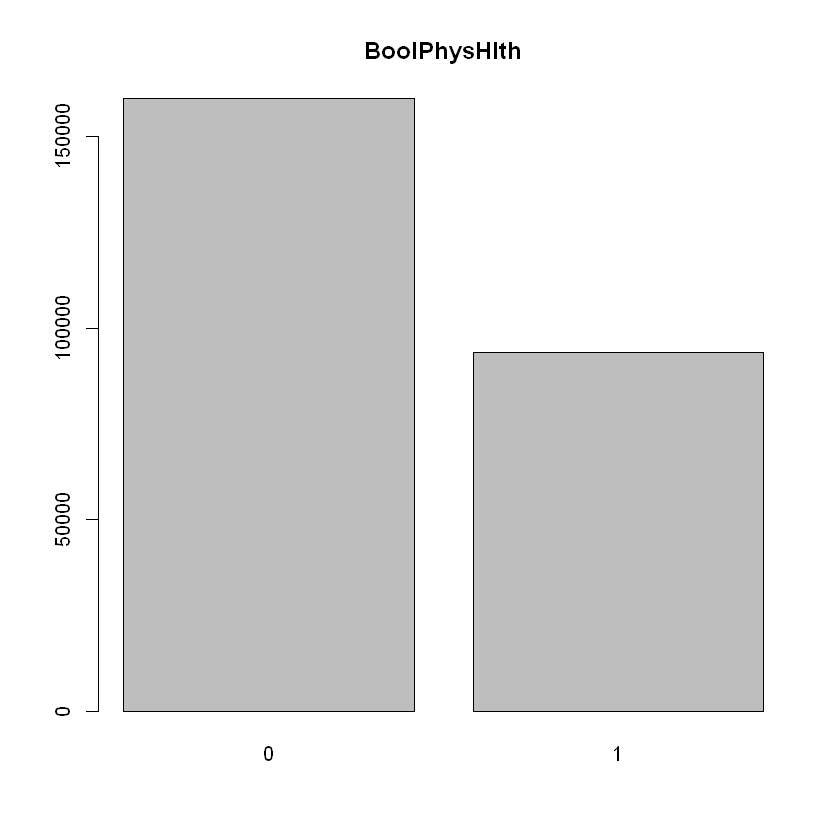

In [400]:
barplot(table(df_std_3$BoolPhysHlth), main="BoolPhysHlth")

In [402]:
chisq.test(table(df_std_3$BoolPhysHlth, df_std_3$Diabetes_binary))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(df_std_3$BoolPhysHlth, df_std_3$Diabetes_binary)
X-squared = 4364, df = 1, p-value < 2.2e-16


In [404]:
# Comment: A p-value close to 0 shows that there is a difference between diabetes rates among BoolPhysHlth groups.

#### PhysHlth output: df_std_3

In [396]:
str(df_std_3)

'data.frame':	253680 obs. of  26 variables:
 $ Index               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 2 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ StdBMI              : Ord.factor w/ 6 levels "1"<"2"<"3"<"4"<..: 6 3 3 3 2 3 4 3 4 2 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 2 1 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 2 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 

### 3.3. Categorical variables analysis (except "StdBMI", "BoolMentHlth", "BoolPhysHlth")

In [397]:
# Categorical variables (18): HighBP, HighChol, CholCheck, Smoker, Stroke,
# HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump,
# AnyHealthcare, NoDocbcCost, GenHlth, DiffWalk, Sex, Age, Education, Income.

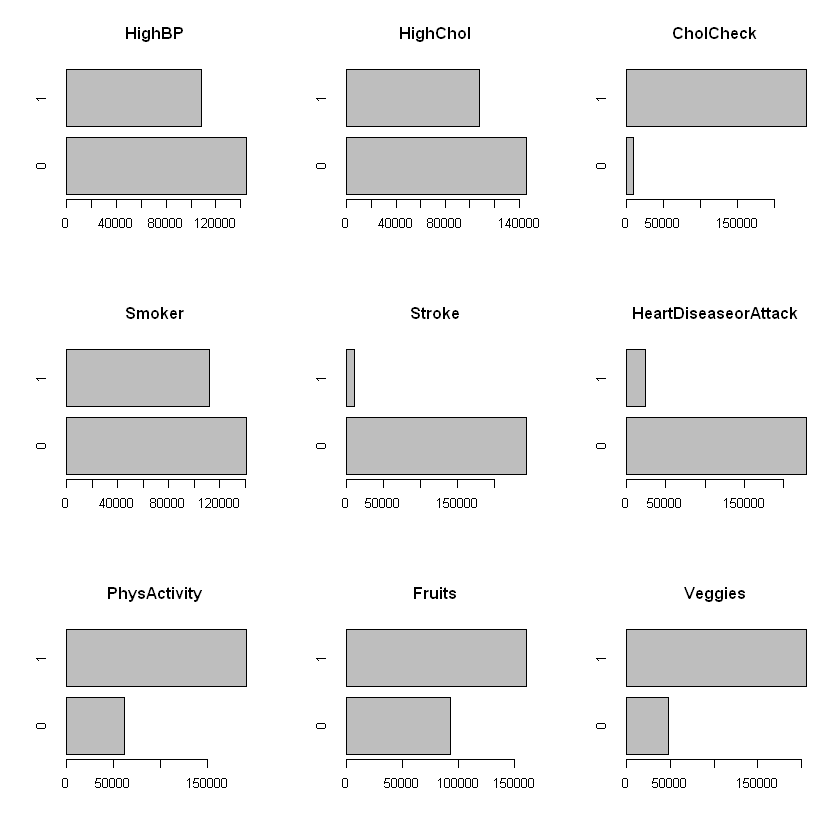

In [417]:
# Plot first 9 categorical variables: 
# HighBP, HighChol, CholCheck, Smoker, Stroke,
# HeartDiseaseorAttack, PhysActivity, Fruits, Veggies,
par(mfrow=c(3,3))
barplot(table(df$HighBP), horiz=T, main="HighBP")
barplot(table(df$HighChol), horiz=T, main="HighChol")
barplot(table(df$CholCheck), horiz=T, main="CholCheck")
barplot(table(df$Smoker), horiz=T, main="Smoker")
barplot(table(df$Stroke), horiz=T, main="Stroke")
barplot(table(df$HeartDiseaseorAttack), horiz=T, main="HeartDiseaseorAttack")
barplot(table(df$PhysActivity), horiz=T, main="PhysActivity")
barplot(table(df$Fruits), horiz=T, main="Fruits")
barplot(table(df$Veggies), horiz=T, main="Veggies")

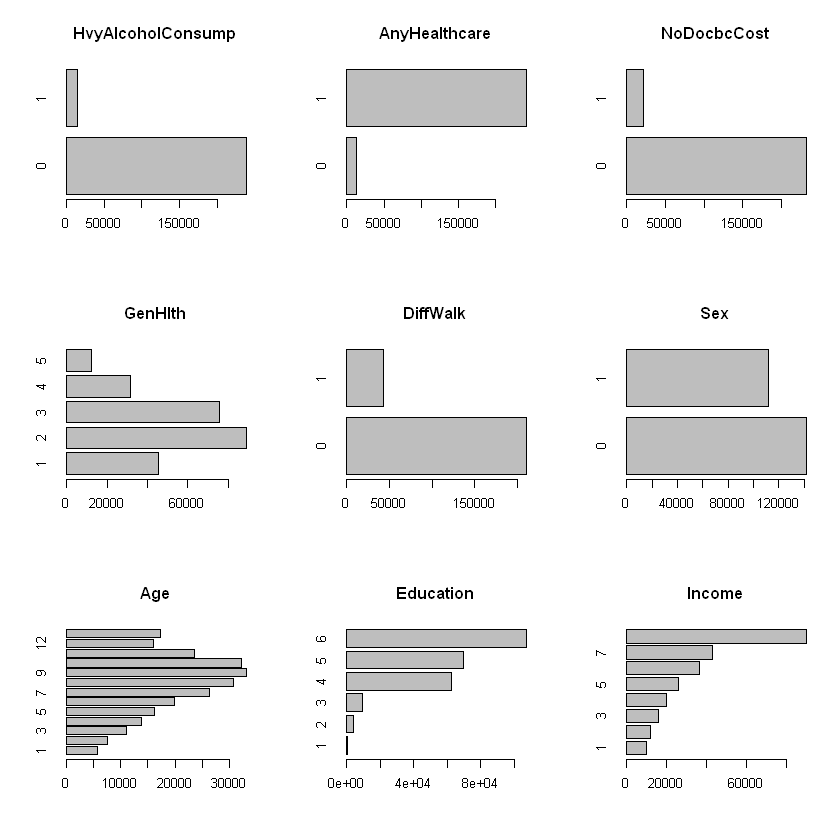

In [418]:
# Plot last 9 categorical variables
# HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, 
# DiffWalk, Sex, Age, Education, Income.
par(mfrow=c(3,3))
barplot(table(df$HvyAlcoholConsump), horiz=T, main="HvyAlcoholConsump")
barplot(table(df$AnyHealthcare), horiz=T, main="AnyHealthcare")
barplot(table(df$NoDocbcCost), horiz=T, main="NoDocbcCost")
barplot(table(df$GenHlth), horiz=T, main="GenHlth")
barplot(table(df$DiffWalk), horiz=T, main="DiffWalk")
barplot(table(df$Sex), horiz=T, main="Sex")
barplot(table(df$Age), horiz=T, main="Age")
barplot(table(df$Education), horiz=T, main="Education")
barplot(table(df$Income), horiz=T, main="Income")

## 3. Exploratory data analysis (EDA)

## 4. Model building

## TEST

In [399]:
# Install and load the package
# install.packages("epitools")
library(epitools)

# Example data (2x2 contingency table)
# Replace this with your actual data
observed <- matrix(c(20, 30, 10, 40), nrow = 2, byrow = TRUE)

# Perform chi-square test, calculate odds ratio, and relative risk
result <- oddsratio(observed)

# Print the result
result

,Disease1,Disease2,Total
Exposed1,20,30,50
Exposed2,10,40,50
Total,30,70,100
,estimate,lower,upper
Exposed1,1.000000,NA,NA
Exposed2,2.624192,1.084569,6.692443
,midp.exact,fisher.exact,chi.square
Exposed1,NA,NA,NA
Exposed2,0.03209931,0.04858163,0.02909633
